In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os, re, glob, cv2, numpy as np

dirs = os.listdir('/content/drive/My Drive/Dataset/')
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob('/content/drive/My Drive/Dataset/'+i+'/*'):
        im = cv2.imread(pic)
        im = cv2.resize(im,(224,224))
        im = np.array(im)
        count = count + 1
        X.append(im)
        y.append(label)
        if(count <= 10):
            im_arr.append({str(i):im})
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)
X = np.array(X)
y = np.array(y);

Jumlah kupu_raja_helena : 100
Jumlah kupu_pantat_merah : 100
Jumlah kupu_jojo : 100
Jumlah kupu_batik_cap : 100
Jumlah kupu_jarak : 100
Jumlah kupu_hijau_biru : 100
Jumlah kupu_harimau_kuning_hijau : 100
Jumlah kupu_raja_limau : 100


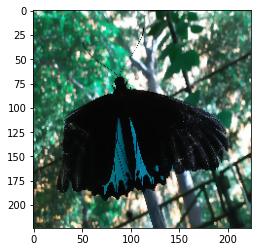

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X[1])

In [ ]:
# pip install livelossplot

In [ ]:
# pip install efficientnet

In [ ]:
!pip install -U git+https://github.com/qubvel/efficientnet

In [4]:
import keras
import tensorflow
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
# from tensorflow.keras.layers import Flatten, Dense,GlobalMaxPooling2D,Input, Dropout
# from tensorflow.keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential
# from livelossplot.keras import PlotLossesCallback
# import efficientnet.keras as efn

In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.70, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_other, y_other, test_size=0.666, random_state=42)
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255
y_train = to_categorical(y_train, len(dirs))
y_valid = to_categorical(y_valid, len(dirs))
y_test = to_categorical(y_test, len(dirs))
print("Found "+str(X_train.shape[0])+" trained image filenames belonging "+str(len(dirs))+" class")
print("Found "+str(X_valid.shape[0])+" validated image filenames belonging "+str(len(dirs))+" class")
print("Found "+str(X_test.shape[0])+" tested image filenames belonging "+str(len(dirs))+" class")

Found 560 trained image filenames belonging 8 class
Found 80 validated image filenames belonging 8 class
Found 160 tested image filenames belonging 8 class


In [6]:
print(lb_arr)

['kupu_raja_helena', 'kupu_pantat_merah', 'kupu_jojo', 'kupu_batik_cap', 'kupu_jarak', 'kupu_hijau_biru', 'kupu_harimau_kuning_hijau', 'kupu_raja_limau']


In [ ]:
# https://github.com/Meghashyamt/CNN-EfficientNet/blob/master/ImageClassifierCNN-EfficientNet.ipynb
# https://github.com/StefanieMueller86/ImageClassification/blob/main/CatDogClassification.ipynb
# https://github.com/AarohiSingla/Image-Classification-Using-EfficientNets/blob/main/2-efficientnetB0_Custom_dataset.ipynb

In [7]:
EPOCHS = 10
BATCH_SIZE = 8
adam = Adam(learning_rate=0.0001)

In [8]:
from tensorflow.python.keras import regularizers
model = tensorflow.keras.applications.EfficientNetB4(include_top=False, input_shape=(224,224,3), pooling='max', weights='imagenet')

x = model.output

x = Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.0001))(x)
x = Dropout(0.5)(x)

# Output layer
predictions = Dense(8, activation="softmax")(x)

model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

print(model_final.summary())

71696384/71686520 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D

In [ ]:
# https://github.com/m-rachman/mood-detection/blob/main/face_detection.ipynb
# https://github.com/JiahaoShen0510/CNN-Food-101-Model/blob/main/CNN%20Food%20101%20Model%20EfficientNet%20B0%20.ipynb

In [ ]:
# https://github.com/mazqoty/CNN_CIFAR100/blob/main/CNN_CIFAR-100_Kaggle_v13.ipynb

In [9]:
# https://github.com/baotramduong/Brain-Tumor-Classification-with-Efficient-Net-and-Grad-CAM-Visualization/blob/main/Notebook.ipynb
# Training

# reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, verbose=1,)

history = model_final.fit(X_train, y_train, epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

                    # , callbacks=[reduce_lr]

scores = model_final.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

# model.save_weights(MODEL_FILE)

Epoch 1/10
70/70 [==============================] - 72s 515ms/step - loss: 3.1688 - accuracy: 0.3643 - val_loss: 4.0441 - val_accuracy: 0.1437
Epoch 2/10
70/70 [==============================] - 33s 469ms/step - loss: 0.8082 - accuracy: 0.7214 - val_loss: 4.6403 - val_accuracy: 0.1063
Epoch 3/10
70/70 [==============================] - 33s 468ms/step - loss: 0.4650 - accuracy: 0.8625 - val_loss: 4.7251 - val_accuracy: 0.1063
Epoch 4/10
70/70 [==============================] - 32s 458ms/step - loss: 0.2816 - accuracy: 0.9125 - val_loss: 3.8915 - val_accuracy: 0.1437
Epoch 5/10
70/70 [==============================] - 33s 468ms/step - loss: 0.2228 - accuracy: 0.9304 - val_loss: 3.6818 - val_accuracy: 0.2125
Epoch 6/10
70/70 [==============================] - 32s 461ms/step - loss: 0.1616 - accuracy: 0.9446 - val_loss: 3.1507 - val_accuracy: 0.2937
Epoch 7/10
70/70 [==============================] - 32s 461ms/step - loss: 0.1702 - accuracy: 0.9518 - val_loss: 2.9616 - val_accuracy: 0.3375

In [10]:
# Evaluate accuracy
test_loss, test_acc = model_final.evaluate(X_test,  y_test, verbose=1)

print('\nTest accuracy:', test_acc)

5/5 [==============================] - 2s 328ms/step - loss: 0.4179 - accuracy: 0.8750

Test accuracy: 0.875


In [11]:
train_loss, train_acc = model_final.evaluate(X_train,  y_train, verbose=1)

print('\nTrain accuracy:', train_acc)

18/18 [==============================] - 11s 392ms/step - loss: 0.2749 - accuracy: 0.9250

Train accuracy: 0.925000011920929


In [12]:
#Graph drawing
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

<Figure size 432x288 with 0 Axes>

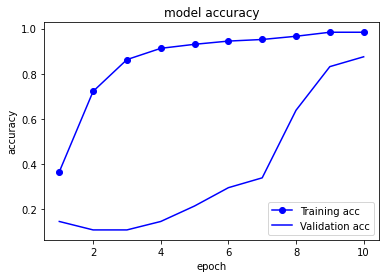

In [13]:
plot_epochs = range(1, len(acc)+1)
# Accuracy
plt.plot(plot_epochs, acc, 'bo-', label='Training acc')
plt.plot(plot_epochs, val_acc, 'b', label='Validation acc')
plt.title('model accuracy')
plt.ylabel('accuracy')  #Y-axis label
plt.xlabel('epoch')  #X-axis label
plt.legend()
plt.show()

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']

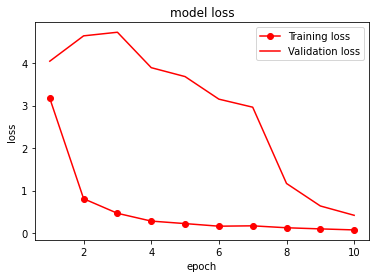

In [15]:
plot_epochs = range(1, len(loss)+1)
# Accuracy
plt.plot(plot_epochs, loss, 'ro-', label='Training loss')
plt.plot(plot_epochs, val_loss, 'r', label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')  #Y-axis label
plt.xlabel('epoch')  #X-axis label
plt.legend()
plt.show()

In [16]:
y_pred = model_final.predict(X_test)

In [17]:
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m)

In [18]:
print(classification_report(y_test_n, y_prediction_n, 
                            target_names=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"]))

                           precision    recall  f1-score   support

kupu_harimau_kuning_hijau       0.71      0.96      0.81        23
         kupu_raja_helena       0.74      1.00      0.85        17
          kupu_hijau_biru       0.94      0.80      0.86        20
           kupu_batik_cap       1.00      0.68      0.81        22
               kupu_jarak       0.91      0.77      0.83        13
          kupu_raja_limau       0.88      0.95      0.91        22
                kupu_jojo       1.00      0.90      0.95        21
        kupu_pantat_merah       1.00      0.91      0.95        22

                 accuracy                           0.88       160
                macro avg       0.90      0.87      0.87       160
             weighted avg       0.90      0.88      0.88       160



In [19]:
y_pred = np.argmax(model_final.predict(X_test), axis=-1)
y_pred

array([3, 3, 0, 3, 0, 1, 0, 7, 4, 2, 5, 0, 7, 3, 0, 5, 0, 3, 7, 0, 0, 5,
       2, 2, 0, 1, 0, 1, 0, 7, 7, 7, 0, 1, 6, 0, 2, 2, 5, 6, 7, 0, 1, 2,
       7, 0, 5, 7, 4, 1, 1, 5, 6, 5, 1, 4, 1, 7, 0, 7, 6, 5, 4, 7, 4, 3,
       2, 5, 7, 5, 7, 1, 5, 2, 1, 0, 6, 4, 3, 6, 0, 4, 0, 3, 4, 0, 6, 0,
       7, 1, 3, 6, 6, 1, 3, 4, 5, 2, 3, 1, 5, 5, 2, 2, 0, 1, 0, 6, 0, 0,
       4, 1, 2, 0, 0, 6, 7, 3, 5, 0, 6, 2, 7, 6, 2, 5, 6, 5, 0, 2, 6, 3,
       0, 1, 5, 6, 3, 1, 5, 0, 4, 6, 5, 7, 2, 5, 5, 1, 1, 7, 6, 1, 1, 7,
       2, 5, 6, 5, 3, 1])

In [20]:
y_test_class = np.argmax(y_test, axis=1)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

0.875


array([[22,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 17,  0,  0,  0,  0,  0,  0],
       [ 4,  0, 16,  0,  0,  0,  0,  0],
       [ 3,  0,  1, 15,  1,  2,  0,  0],
       [ 1,  2,  0,  0, 10,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 21,  0,  0],
       [ 0,  2,  0,  0,  0,  0, 19,  0],
       [ 1,  1,  0,  0,  0,  0,  0, 20]])

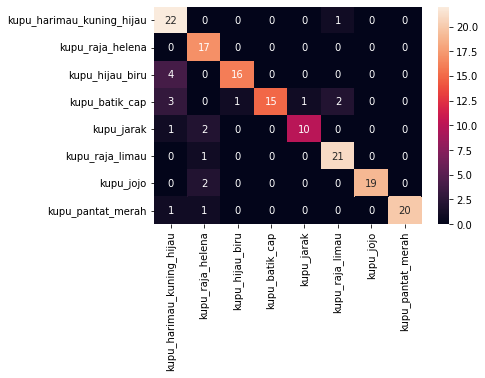

In [22]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"], 
           yticklabels=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"])

In [ ]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# 
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# 
# epochs_range = range(EPOCHS)
# 
# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')
# 
# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()